In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
import scipy as sc
import os
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import QuantileRegressor
from sklearn.metrics import mean_absolute_error
import sklearn
import glob
import pathlib as pl

In [2]:
##data must be converted into a 2D matrix for pca analysis
##transform takes a 3D data array (time, a, b) -> (a*b, time)
##(the data grid is flattened a column using numpy.flatten)

def transform(xarr):
    arr = np.array(xarr) ##converting to numpy array
    arr = arr.reshape(arr.shape[0], arr.shape[1]*arr.shape[2]) ##reshaping from size (a, b, c) to (a, b*c)
    arr = arr.transpose()
    return arr

def reverse(mat, orig_shape):
    arr = np.copy(mat)
    arr = arr.transpose()
    arr = arr.reshape(-1, orig_shape[1], orig_shape[2]) ##reshaping back to original array shape
    return arr

In [3]:
hr_eigs = np.array( pd.read_csv('/ocean/arandhawa/MOAD/analysis-armaan/notebooks/eigvecs_hrdps_annual.csv', header = None) )
hr_PCs = np.array( pd.read_csv('/ocean/arandhawa/MOAD/analysis-armaan/notebooks/PCs_hrdps_annual.csv', header = None) )
hr_data = np.array( pd.read_csv('/ocean/arandhawa/MOAD/analysis-armaan/notebooks/raw_data_3h.csv', header = None) )
print(hr_PCs.shape)
print(hr_eigs.shape)

(136192, 50)
(50, 2904)


In [4]:
new_eigs = np.array( pd.read_csv('/ocean/arandhawa/MOAD/analysis-armaan/notebooks/eigvecs_recon.csv', header = None) )

## Analysing Reconstructed Data

In [5]:
new_eigs.shape

(20, 2904)

In [6]:
split = int( hr_data.shape[0]/2 )
u_data = reverse(hr_data[:split,:], (0, 266, 256)) ##getting HRDPS u-winds
v_data = reverse(hr_data[split:,:], (0, 266, 256)) ##getting HRDPS v-winds

In [7]:
recon = np.matmul(hr_PCs[:,0:20], new_eigs)
split4 = int( recon.shape[0]/2 )
u_data_rec = reverse(recon[:split4,:], (0, 266, 256)) ##reconstructing u_winds from n PCs
v_data_rec = reverse(recon[split4:,:], (0, 266, 256)) ##reconstructing v_winds from n PCs

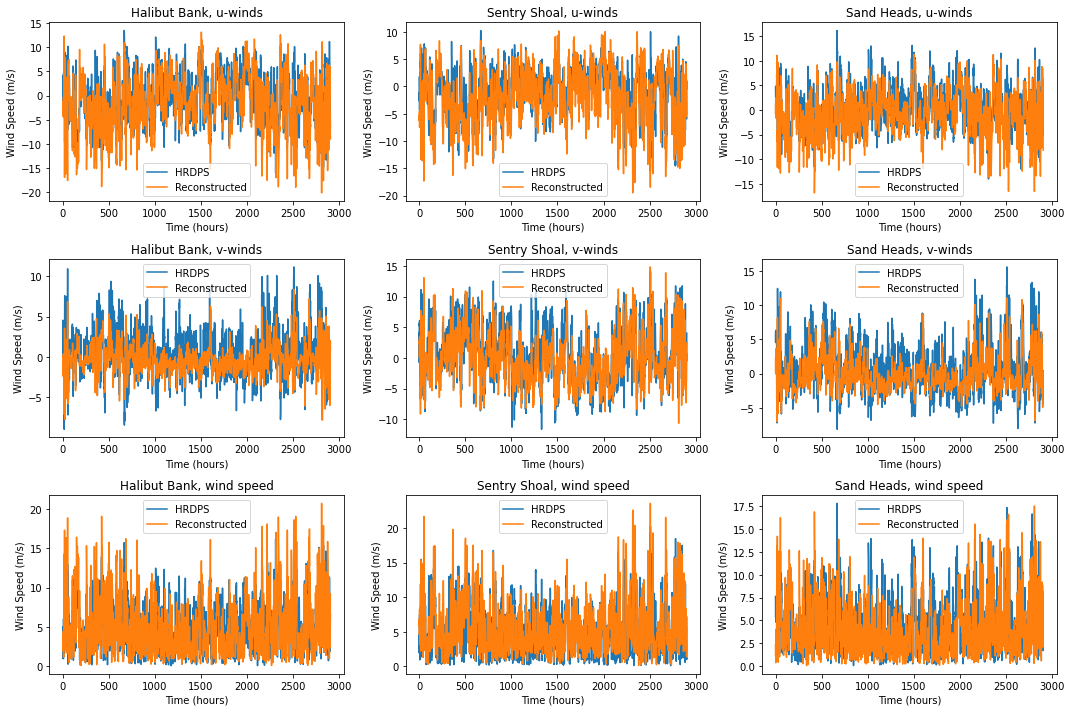

In [8]:
## Plotting raw / averaged data at three locations.

fig, ax = plt.subplots(3, 3, figsize=(15, 10))

ax[0, 0].plot(u_data[:,142,139], label = "HRDPS")
ax[0, 0].plot(u_data_rec[:,142,139], label = "Reconstructed")
ax[0, 0].set_title("Halibut Bank, u-winds")
ax[0, 0].set_xlabel("Time (hours)")
ax[0, 0].set_ylabel("Wind Speed (m/s)")
ax[0, 0].legend()

ax[0, 1].plot(u_data[:,174,107], label = "HRDPS")
ax[0, 1].plot(u_data_rec[:,174,107], label = "Reconstructed")
ax[0, 1].set_title("Sentry Shoal, u-winds")
ax[0, 1].set_xlabel("Time (hours)")
ax[0, 1].set_ylabel("Wind Speed (m/s)")
ax[0, 1].legend()

ax[0, 2].plot(u_data[:,129,149], label = "HRDPS")
ax[0, 2].plot(u_data_rec[:,129, 149], label = "Reconstructed")
ax[0, 2].set_title("Sand Heads, u-winds")
ax[0, 2].set_xlabel("Time (hours)")
ax[0, 2].set_ylabel("Wind Speed (m/s)")
ax[0, 2].legend()

ax[1, 0].plot(v_data[:,142,139], label = "HRDPS")
ax[1, 0].plot(v_data_rec[:,142,139], label = "Reconstructed")
ax[1, 0].set_title("Halibut Bank, v-winds")
ax[1, 0].set_xlabel("Time (hours)")
ax[1, 0].set_ylabel("Wind Speed (m/s)")
ax[1, 0].legend()

ax[1, 1].plot(v_data[:,174,107], label = "HRDPS")
ax[1, 1].plot(v_data_rec[:,174,107], label = "Reconstructed")
ax[1, 1].set_title("Sentry Shoal, v-winds")
ax[1, 1].set_xlabel("Time (hours)")
ax[1, 1].set_ylabel("Wind Speed (m/s)")
ax[1, 1].legend()

ax[1, 2].plot(v_data[:,129,149], label = "HRDPS")
ax[1, 2].plot(v_data_rec[:,129, 149], label = "Reconstructed")
ax[1, 2].set_title("Sand Heads, v-winds")
ax[1, 2].set_xlabel("Time (hours)")
ax[1, 2].set_ylabel("Wind Speed (m/s)")
ax[1, 2].legend()

ax[2,0].plot(np.sqrt(u_data[:,142,139]**2 + v_data[:,142,139]**2), label = "HRDPS")
ax[2,0].plot(np.sqrt(u_data_rec[:,142,139]**2 + v_data_rec[:,142,139]**2), label = "Reconstructed")
ax[2,0].set_xlabel("Time (hours)")
ax[2,0].set_title("Halibut Bank, wind speed")
ax[2,0].set_ylabel("Wind Speed (m/s)")
ax[2,0].legend()

ax[2,1].plot(np.sqrt(u_data[:,174,107]**2 + v_data[:,174,107]**2), label = "HRDPS")
ax[2,1].plot(np.sqrt(u_data_rec[:,174,107]**2 + v_data_rec[:,174,107]**2), label = "Reconstructed")
ax[2,1].set_xlabel("Time (hours)")
ax[2,1].set_title("Sentry Shoal, wind speed")
ax[2,1].set_ylabel("Wind Speed (m/s)")
ax[2,1].legend()

ax[2,2].plot(np.sqrt(u_data[:,129,149]**2 + v_data[:,129,149]**2) , label = "HRDPS")
ax[2,2].plot(np.sqrt(u_data_rec[:,129,149]**2 + v_data_rec[:,129,149]**2) , label = "Reconstructed")
ax[2,2].set_xlabel("Time (hours)")
ax[2,2].set_title("Sand Heads, wind speed")
ax[2,2].set_ylabel("Wind Speed (m/s)")
ax[2,2].legend()

plt.tight_layout()

In [9]:
nums = np.arange(0, 37, 3)
print(nums)

[ 0  3  6  9 12 15 18 21 24 27 30 33 36]


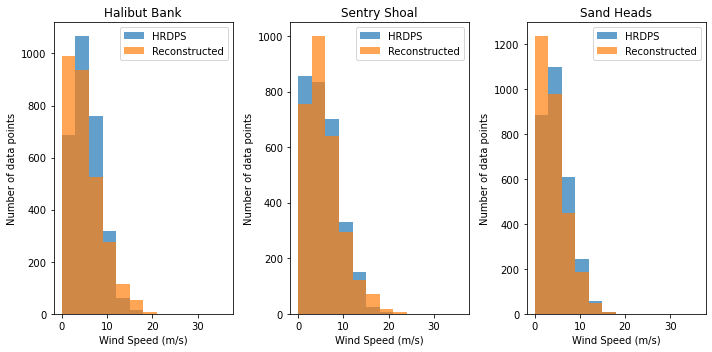

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].set_title("Halibut Bank")
ax[0].hist(np.sqrt(u_data[:,142,139]**2 + v_data[:,142,139]**2), bins = nums, label = "HRDPS", alpha = 0.7)
ax[0].hist(np.sqrt(u_data_rec[:,142,139]**2 + v_data_rec[:,142,139]**2), bins = nums, label = "Reconstructed", alpha = 0.7)
ax[0].set_xlabel("Wind Speed (m/s)")
ax[0].set_ylabel("Number of data points")
ax[0].legend()

ax[1].set_title("Sentry Shoal")
ax[1].hist(np.sqrt(u_data[:,174,107]**2 + v_data[:,174,107]**2), bins = nums, label = "HRDPS", alpha = 0.7)
ax[1].hist(np.sqrt(u_data_rec[:,174,107]**2 + v_data_rec[:,174,107]**2), bins = nums, label = "Reconstructed", alpha = 0.7)
ax[1].set_xlabel("Wind Speed (m/s)")
ax[1].set_ylabel("Number of data points")
ax[1].legend()

ax[2].set_title("Sand Heads")
ax[2].hist(np.sqrt(u_data[:,129,149]**2 + v_data[:,129,149]**2) , bins = nums,  label = "HRDPS", alpha = 0.7)
ax[2].hist(np.sqrt(u_data_rec[:,129,149]**2 + v_data_rec[:,129,149]**2) , bins = nums, label = "Reconstructed", alpha = 0.7)
ax[2].set_xlabel("Wind Speed (m/s)")
ax[2].set_ylabel("Number of data points")
ax[2].legend()

plt.tight_layout()

In [11]:
def helper(x, y, ax, i, j,):
    
    a, b = np.polyfit(x, y, 1)
    bias = np.mean( y - x )
    correlation_matrix = np.corrcoef(x, y)
    r_squared = correlation_matrix[0,1]**2
    y_pred = a*x + b
    rmse = np.sqrt( sklearn.metrics.mean_squared_error(y, y_pred) )
    
    ax[i,j].scatter(x, y)
    ax[i,j].plot(x, a*x+b, color = 'orange')
    ax[i,j].annotate("r-squared = {:.3f}".format(r_squared), (-12, 17))
    ax[i,j].annotate("bias = {:.3f}".format(bias), (-12, 15))
    ax[i,j].annotate("RMS error = {:.3f}".format(rmse), (-12, 13))
    ax[i,j].annotate("y = {:.3f}x + {:.3f}".format(a, b), (-12, 11))
    ax[i,j].set_ylabel("HRDPS data")
    ax[i,j].set_xlabel("reconstructed data")
    ax[i,j].set_ylim(-13, 20)
    ax[i,j].set_xlim(-13, 20)
    return (a, b)

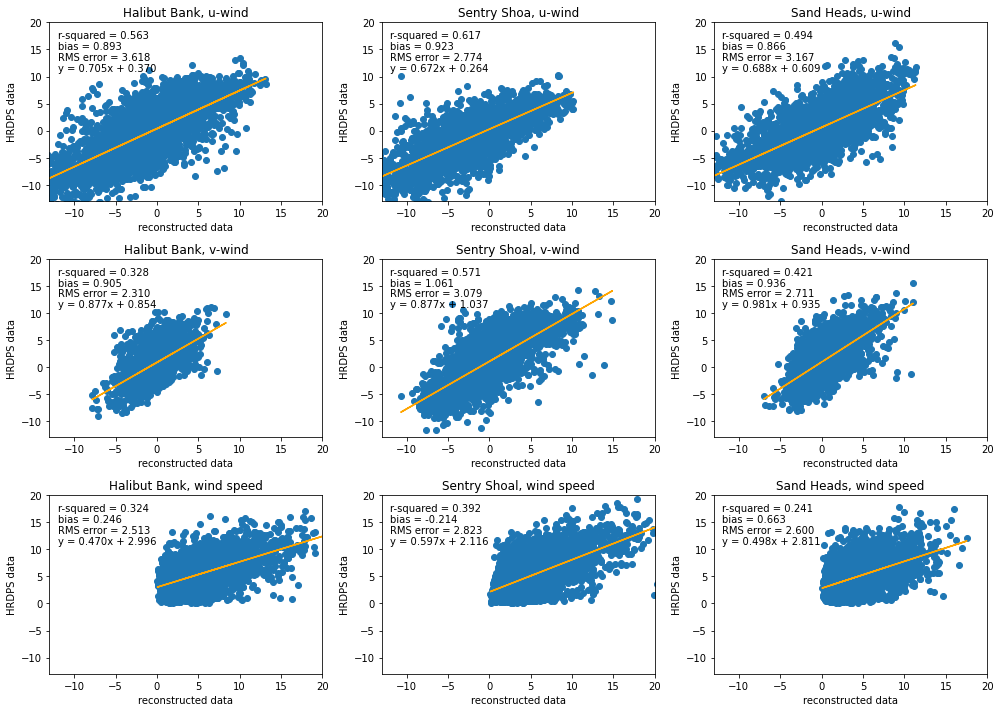

In [12]:
a = np.empty((3, 3))
b = np.empty((3, 3))

fig, ax = plt.subplots(3, 3, figsize = (14, 10))
##Habibut bank
y = u_data[:, 142, 139]
x = u_data_rec[:, 142, 139]
ax[0, 0].set_title("Halibut Bank, u-wind")
a[0,0], b[0,0] = helper(x, y, ax, 0, 0)

y = v_data[:, 142, 139]
x = v_data_rec[:, 142, 139]
ax[1, 0].set_title("Halibut Bank, v-wind")
a[1,0], b[1,0] = helper(x, y, ax, 1, 0)

y = np.sqrt(u_data[:, 142, 139]**2 + v_data[:, 142, 139]**2)
x = np.sqrt(u_data_rec[:, 142, 139]**2 + v_data_rec[:, 142, 139]**2)
ax[2, 0].set_title("Halibut Bank, wind speed")
a[2,0], b[2,0] = helper(x, y, ax, 2, 0)

##Sentry Shoal
y = u_data[:,174, 107]
x = u_data_rec[:,174, 107]
ax[0, 1].set_title("Sentry Shoa, u-wind")
a[0,1], b[0,1] = helper(x, y, ax, 0, 1)

y = v_data[:,174, 107]
x = v_data_rec[:,174, 107]
ax[1, 1].set_title("Sentry Shoal, v-wind")
a[1,1], b[1,1] = helper(x, y, ax, 1, 1)

y = np.sqrt(u_data[:,174, 107]**2 + v_data[:,174, 107]**2)
x = np.sqrt(u_data_rec[:,174, 107]**2 + v_data_rec[:,174, 107]**2)
ax[2, 1].set_title("Sentry Shoal, wind speed")
a[2,1], b[2,1] = helper(x, y, ax, 2, 1)

##Sand Heads
y = u_data[:,129,149]
x = u_data_rec[:,129,149]
ax[0, 2].set_title("Sand Heads, u-wind")
a[0,2], b[0,2] = helper(x, y, ax, 0, 2)

y = v_data[:,129,149]
x = v_data_rec[:,129,149]
ax[1, 2].set_title("Sand Heads, v-wind")
a[1,2], b[1,2] = helper(x, y, ax, 1, 2)

y = np.sqrt(u_data[:,129,149]**2 + v_data[:,129,149]**2)
x = np.sqrt(u_data_rec[:,129,149]**2 + v_data_rec[:,129,149]**2)
ax[2, 2].set_title("Sand Heads, wind speed")
a[2,2], b[2,2] = helper(x, y, ax, 2, 2)

plt.tight_layout()